# Import

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
import statsmodels.api as sm
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from hyperopt import fmin, tpe, hp
import xgboost as xgb
import lightgbm as lgb
import catboost
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import re, random, nltk
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.metrics.distance import jaccard_distance
from nltk.corpus import words
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
%matplotlib inline
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
from nltk.data import load

2024-02-18 07:55:31.686201: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 07:55:31.686420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 07:55:31.835440: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Loading

In [ ]:
train_df = pd.read_csv('/kaggle/input/planttraits2024/train.csv')
test_df = pd.read_csv('/kaggle/input/planttraits2024/test.csv')
submission = pd.read_csv('/kaggle/input/planttraits2024/sample_submission.csv')
train_df.head()

id  WORLDCLIM_BIO1_annual_mean_temperature  \
0  192027691                               12.235703   
1  195542235                               17.270555   
2  196639184                               14.254504   
3  195728812                               18.680834   
4  195251545                                0.673204   

   WORLDCLIM_BIO12_annual_precipitation  \
0                            374.466675   
1                             90.239998   
2                            902.071411   
3                           1473.933350   
4                            530.088867   

   WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
0                                          62.524445                       
1                                          10.351111                       
2                                          49.642857                       
3                                         163.100006                       
4                                          50.857777                       

   WORLDCLIM_BIO15_precipitation_seasonality  \
0                                  72.256844   
1                                  38.220940   
2                                  17.873655   
3                                  45.009758   
4                                  38.230709   

   WORLDCLIM_BIO4_temperature_seasonality  \
0                              773.592041   
1                              859.193298   
2                              387.977753   
3                              381.053986   
4                             1323.526855   

   WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
0                                33.277779                            125   
1                                40.009777                            124   
2                                22.807142                            107   
3                                20.436666                            120   
4                                45.891998                             91   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  ...  \
0                                149                              136  ...   
1                                144                              138  ...   
2                                133                              119  ...   
3                                131                              125  ...   
4                                146                              120  ...   

   X18_mean   X26_mean  X50_mean   X3112_mean     X4_sd    X11_sd    X18_sd  \
0  0.117484   1.243779  1.849375    50.216034  0.008921  1.601473  0.025441   
1  0.389315   0.642940  1.353468   574.098472  0.003102  0.258078  0.000866   
2  8.552908   0.395241  2.343153  1130.096731       NaN       NaN       NaN   
3  1.083629   0.154200  1.155308  1042.686546  0.011692  2.818356  0.110673   
4  0.657585  10.919966  2.246226  2386.467180  0.006157  1.128000  0.026996   

     X26_sd    X50_sd    X3112_sd  
0  0.153608  0.279610   15.045054  
1  0.034630  0.010165   11.004477  
2       NaN       NaN         NaN  
3  0.011334  0.229224  141.857187  
4  0.553815  0.107092   87.146899  

[5 rows x 176 columns]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(55489, 176)
(13873, 164)


In [ ]:
train_df.isnull().sum().sum()

98046

In [ ]:
sum(train_df.isnull().sum()!=0)

6

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Columns: 176 entries, id to X3112_sd
dtypes: float64(54), int64(122)
memory usage: 74.5 MB


In [ ]:
list(train_df.columns)

['id',
 'WORLDCLIM_BIO1_annual_mean_temperature',
 'WORLDCLIM_BIO12_annual_precipitation',
 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
 'WORLDCLIM_BIO15_precipitation_seasonality',
 'WORLDCLIM_BIO4_temperature_seasonality',
 'WORLDCLIM_BIO7_temperature_annual_range',
 'SOIL_bdod_0.5cm_mean_0.01_deg',
 'SOIL_bdod_100.200cm_mean_0.01_deg',
 'SOIL_bdod_15.30cm_mean_0.01_deg',
 'SOIL_bdod_30.60cm_mean_0.01_deg',
 'SOIL_bdod_5.15cm_mean_0.01_deg',
 'SOIL_bdod_60.100cm_mean_0.01_deg',
 'SOIL_cec_0.5cm_mean_0.01_deg',
 'SOIL_cec_100.200cm_mean_0.01_deg',
 'SOIL_cec_15.30cm_mean_0.01_deg',
 'SOIL_cec_30.60cm_mean_0.01_deg',
 'SOIL_cec_5.15cm_mean_0.01_deg',
 'SOIL_cec_60.100cm_mean_0.01_deg',
 'SOIL_cfvo_0.5cm_mean_0.01_deg',
 'SOIL_cfvo_100.200cm_mean_0.01_deg',
 'SOIL_cfvo_15.30cm_mean_0.01_deg',
 'SOIL_cfvo_30.60cm_mean_0.01_deg',
 'SOIL_cfvo_5.15cm_mean_0.01_deg',
 'SOIL_cfvo_60.100cm_mean_0.01_deg',
 'SOIL_clay_0.5cm_mean_0.01_deg',
 'SOIL_clay_100.200cm_mean

In [ ]:
# List of column names
columns = list(train_df.columns)
grouped_columns = {}

# Iterate through each column name
for column in columns:
    # Split column name by underscore or other relevant delimiter to extract the prefix
    # Assuming the prefix is the first part before the first underscore
    prefix = column.split('_')[0]

    # Check if the prefix includes numbers and set a custom prefix for those cases
    if prefix.isdigit():
        prefix = 'CUSTOM_VARIABLES'

    # Add the column name to the corresponding list in the dictionary
    if prefix not in grouped_columns:
        grouped_columns[prefix] = [column]
    else:
        grouped_columns[prefix].append(column)

# grouped_columns now holds your columns grouped by their prefix
grouped_columns

{'id': ['id'],
 'WORLDCLIM': ['WORLDCLIM_BIO1_annual_mean_temperature',
  'WORLDCLIM_BIO12_annual_precipitation',
  'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
  'WORLDCLIM_BIO15_precipitation_seasonality',
  'WORLDCLIM_BIO4_temperature_seasonality',
  'WORLDCLIM_BIO7_temperature_annual_range'],
 'SOIL': ['SOIL_bdod_0.5cm_mean_0.01_deg',
  'SOIL_bdod_100.200cm_mean_0.01_deg',
  'SOIL_bdod_15.30cm_mean_0.01_deg',
  'SOIL_bdod_30.60cm_mean_0.01_deg',
  'SOIL_bdod_5.15cm_mean_0.01_deg',
  'SOIL_bdod_60.100cm_mean_0.01_deg',
  'SOIL_cec_0.5cm_mean_0.01_deg',
  'SOIL_cec_100.200cm_mean_0.01_deg',
  'SOIL_cec_15.30cm_mean_0.01_deg',
  'SOIL_cec_30.60cm_mean_0.01_deg',
  'SOIL_cec_5.15cm_mean_0.01_deg',
  'SOIL_cec_60.100cm_mean_0.01_deg',
  'SOIL_cfvo_0.5cm_mean_0.01_deg',
  'SOIL_cfvo_100.200cm_mean_0.01_deg',
  'SOIL_cfvo_15.30cm_mean_0.01_deg',
  'SOIL_cfvo_30.60cm_mean_0.01_deg',
  'SOIL_cfvo_5.15cm_mean_0.01_deg',
  'SOIL_cfvo_60.100cm_mean_0.01_deg',
  'SOI

In [ ]:
df1= train_df[['id']+grouped_columns['WORLDCLIM']].copy()

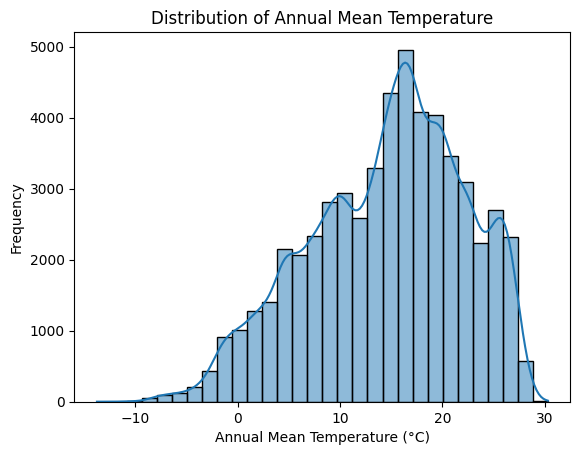

In [ ]:
sns.histplot(data=df1, x='WORLDCLIM_BIO1_annual_mean_temperature', bins=30, kde=True)
plt.title('Distribution of Annual Mean Temperature')
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

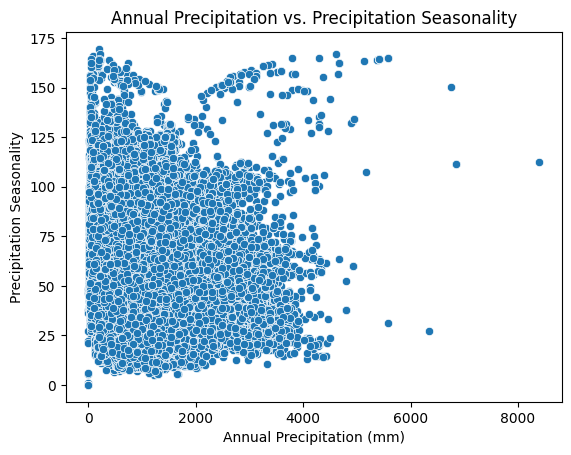

In [ ]:
sns.scatterplot(data=df1, x='WORLDCLIM_BIO12_annual_precipitation', y='WORLDCLIM_BIO15_precipitation_seasonality')
plt.title('Annual Precipitation vs. Precipitation Seasonality')
plt.xlabel('Annual Precipitation (mm)')
plt.ylabel('Precipitation Seasonality')
plt.show()

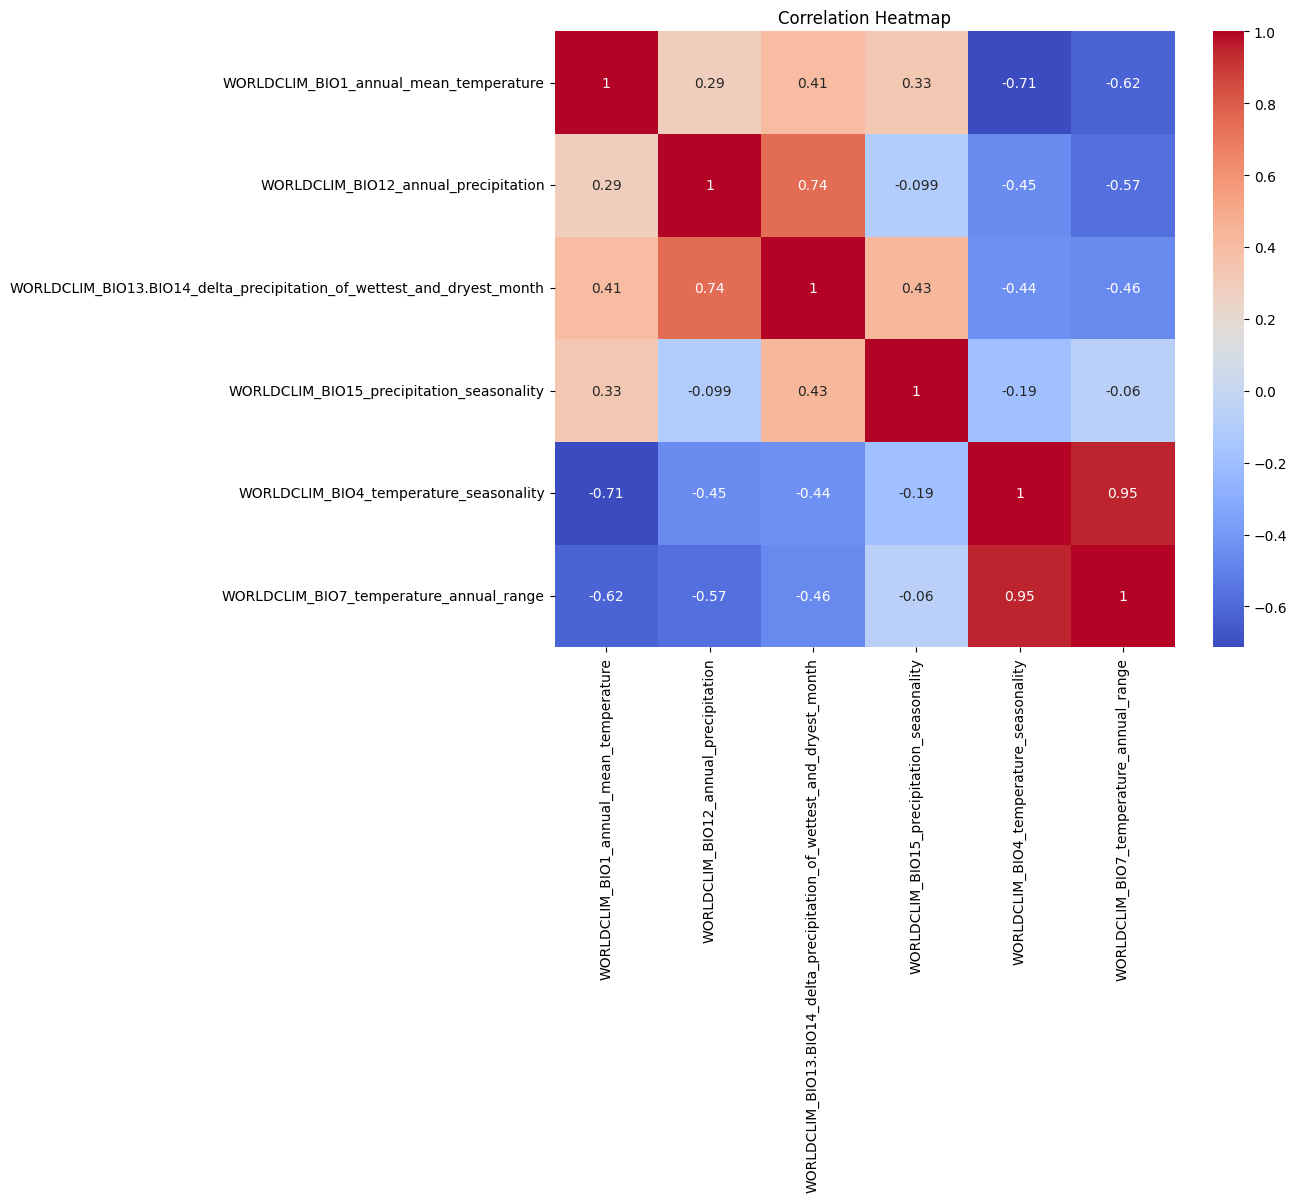

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1[['WORLDCLIM_BIO1_annual_mean_temperature', 'WORLDCLIM_BIO12_annual_precipitation', 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month', 'WORLDCLIM_BIO15_precipitation_seasonality', 'WORLDCLIM_BIO4_temperature_seasonality', 'WORLDCLIM_BIO7_temperature_annual_range']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

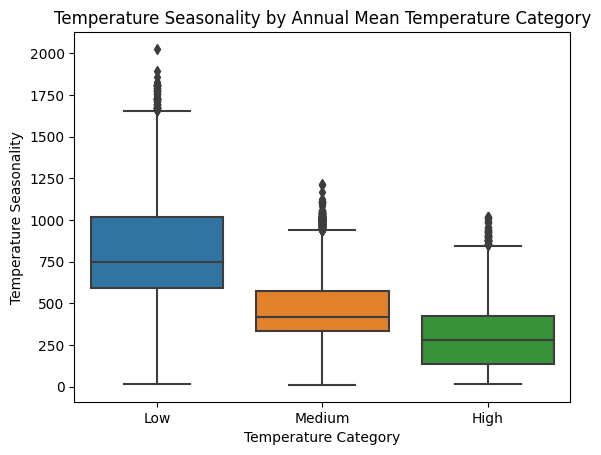

In [ ]:
df1['Temp_Category'] = pd.qcut(df1['WORLDCLIM_BIO1_annual_mean_temperature'], q=3, labels=['Low', 'Medium', 'High'])

sns.boxplot(data=df1, x='Temp_Category', y='WORLDCLIM_BIO4_temperature_seasonality')
plt.title('Temperature Seasonality by Annual Mean Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Temperature Seasonality')
plt.show()

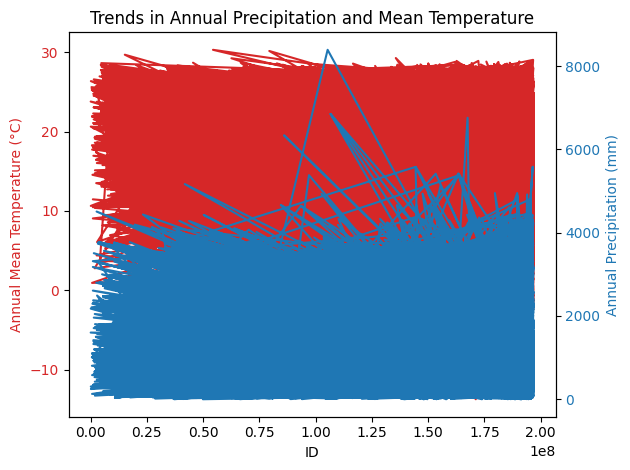

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('ID')
ax1.set_ylabel('Annual Mean Temperature (°C)', color=color)
ax1.plot(df1['id'], df1['WORLDCLIM_BIO1_annual_mean_temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Annual Precipitation (mm)', color=color)
ax2.plot(df1['id'], df1['WORLDCLIM_BIO12_annual_precipitation'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Trends in Annual Precipitation and Mean Temperature')
fig.tight_layout()
plt.show()

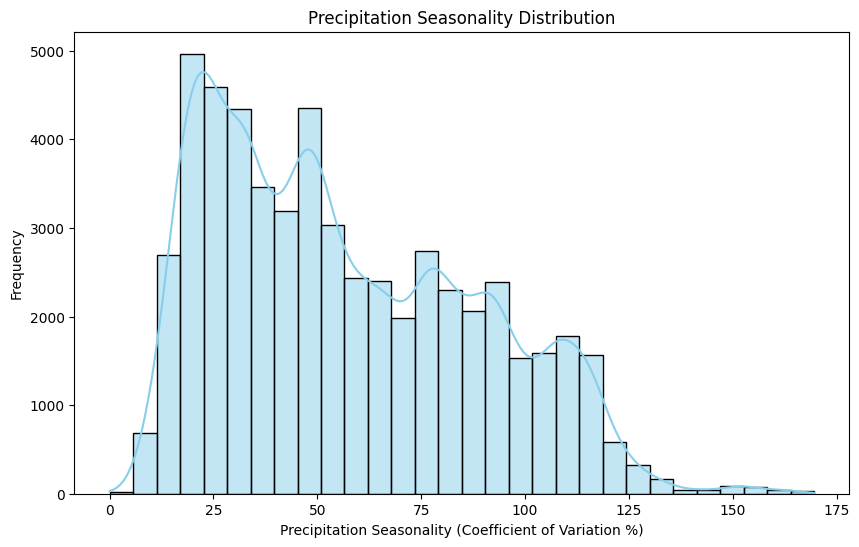

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['WORLDCLIM_BIO15_precipitation_seasonality'], bins=30, kde=True, color='skyblue')
plt.title('Precipitation Seasonality Distribution')
plt.xlabel('Precipitation Seasonality (Coefficient of Variation %)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df2= train_df[['id']+grouped_columns['SOIL']].copy()
df2.head()

id  SOIL_bdod_0.5cm_mean_0.01_deg  \
0  192027691                            125   
1  195542235                            124   
2  196639184                            107   
3  195728812                            120   
4  195251545                             91   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  \
0                                149                              136   
1                                144                              138   
2                                133                              119   
3                                131                              125   
4                                146                              120   

   SOIL_bdod_30.60cm_mean_0.01_deg  SOIL_bdod_5.15cm_mean_0.01_deg  \
0                              145                             132   
1                              143                             128   
2                              126                             114   
3                              131                             123   
4                              138                             109   

   SOIL_bdod_60.100cm_mean_0.01_deg  SOIL_cec_0.5cm_mean_0.01_deg  \
0                               148                           228   
1                               142                           145   
2                               132                           283   
3                               131                           234   
4                               143                           381   

   SOIL_cec_100.200cm_mean_0.01_deg  SOIL_cec_15.30cm_mean_0.01_deg  ...  \
0                               210                             221  ...   
1                               139                             149  ...   
2                               254                             252  ...   
3                               220                             223  ...   
4                               325                             352  ...   

   SOIL_silt_15.30cm_mean_0.01_deg  SOIL_silt_30.60cm_mean_0.01_deg  \
0                              373                              359   
1                              317                              303   
2                              304                              291   
3                              315                              293   
4                              376                              377   

   SOIL_silt_5.15cm_mean_0.01_deg  SOIL_silt_60.100cm_mean_0.01_deg  \
0                             367                               353   
1                             310                               292   
2                             306                               278   
3                             312                               308   
4                             367                               353   

   SOIL_soc_0.5cm_mean_0.01_deg  SOIL_soc_100.200cm_mean_0.01_deg  \
0                           312                                49   
1                            52                                49   
2                           783                               288   
3                           473                                62   
4                           737                               178   

   SOIL_soc_15.30cm_mean_0.01_deg  SOIL_soc_30.60cm_mean_0.01_deg  \
0                             126                              94   
1                              33                              22   
2                             412                             309   
3                             224                              97   
4                             331                             214   

   SOIL_soc_5.15cm_mean_0.01_deg  SOIL_soc_60.100cm_mean_0.01_deg  
0                            208                               38  
1                             50                               20  
2                            504                              255  
3                            344       

In [ ]:
columns = list(df2.columns[1:])
categories = {
    'bdod': [],
    'cec': [],
    'cfvo': [],
    'clay': [],
    'nitrogen': [],
    'ocd': [],
    'ocs': [],
    'phh2o': [],
    'sand': [],
    'silt': [],
    'soc': []
}

for col in columns:
    prefix = col.split('_')[1]
    categories[prefix].append(col)

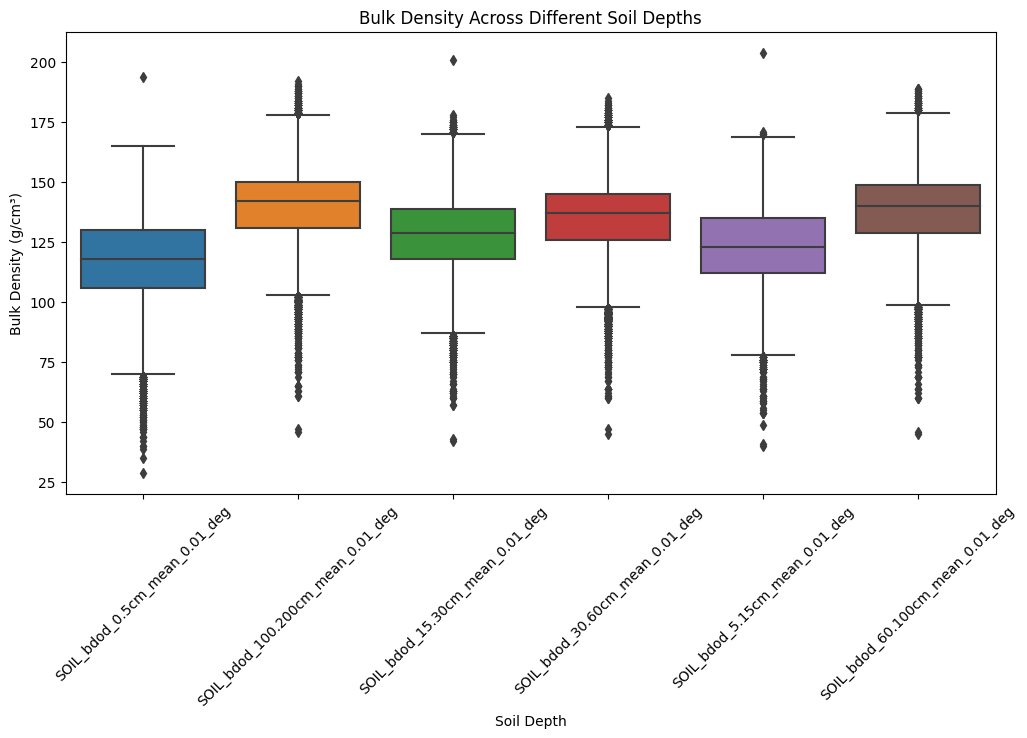

In [ ]:
bdod_cols = [col for col in df2.columns if 'SOIL_bdod' in col]
df_bdod = df2[bdod_cols]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_bdod)
plt.xticks(rotation=45)
plt.title('Bulk Density Across Different Soil Depths')
plt.ylabel('Bulk Density (g/cm³)')
plt.xlabel('Soil Depth')
plt.show()

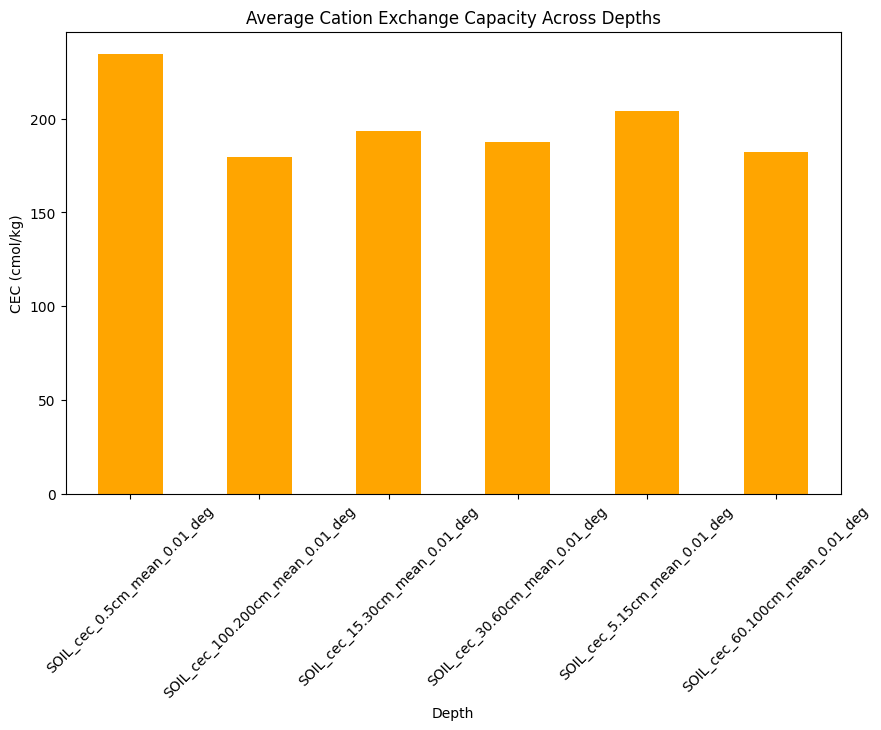

In [ ]:
cec_columns = categories['cec']
df2[cec_columns].mean().plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Average Cation Exchange Capacity Across Depths')
plt.xlabel('Depth')
plt.ylabel('CEC (cmol/kg)')
plt.xticks(rotation=45)
plt.show()

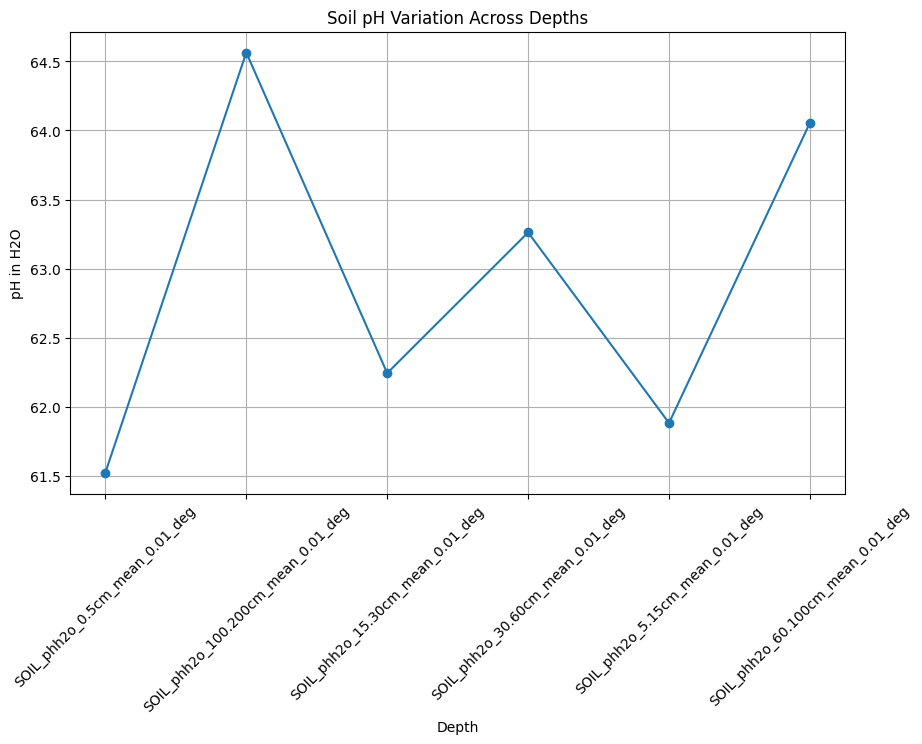

In [ ]:
phh2o_columns = categories['phh2o']
df2[phh2o_columns].mean().plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Soil pH Variation Across Depths')
plt.xlabel('Depth')
plt.ylabel('pH in H2O')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

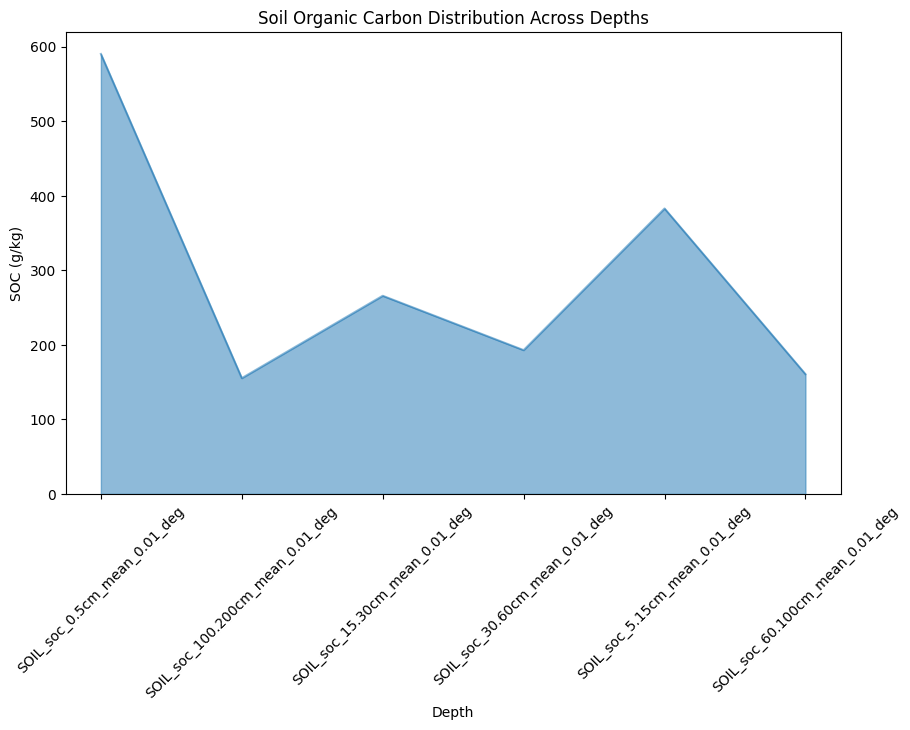

In [ ]:
soc_columns = categories['soc']
df2[soc_columns].mean().plot(kind='area', figsize=(10, 6), alpha=0.5)
plt.title('Soil Organic Carbon Distribution Across Depths')
plt.xlabel('Depth')
plt.ylabel('SOC (g/kg)')
plt.xticks(rotation=45)
plt.show()

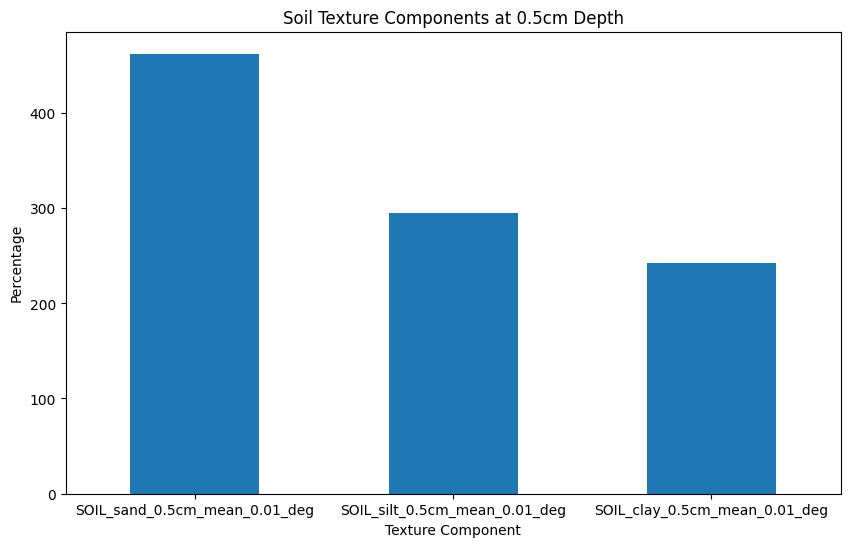

In [ ]:
texture_cols = ['SOIL_sand_0.5cm_mean_0.01_deg', 'SOIL_silt_0.5cm_mean_0.01_deg', 'SOIL_clay_0.5cm_mean_0.01_deg']
df_texture = df2[texture_cols]

# Average texture component for visualization
texture_means = df_texture.mean()

plt.figure(figsize=(10, 6))
texture_means.plot(kind='bar')
plt.title('Soil Texture Components at 0.5cm Depth')
plt.ylabel('Percentage')
plt.xlabel('Texture Component')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df3= train_df[['id']+grouped_columns['MODIS']].copy()
df3.head()

id  \
0  192027691   
1  195542235   
2  196639184   
3  195728812   
4  195251545   

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1  \
0                                                543                     
1                                                837                     
2                                                953                     
3                                                565                     
4                                               3137                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1  \
0                                                943                     
1                                                920                     
2                                               3236                     
3                                               3225                     
4                                               3253                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1  \
0                                                429                     
1                                                527                     
2                                                519                     
3                                                296                     
4                                               3727                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1  \
0                                                568                     
1                                                710                     
2                                                885                     
3                                                661                     
4                                               3386                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1  \
0                                               1199                     
1                                                977                     
2                                               3682                     
3                                               3379                     
4                                               2286                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10  \
0                                                657                      
1                                               1111                      
2                                                501                      
3                                                617                      
4                                                838                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10  \
0                                               1088                      
1                                               1218                      
2                                               4240                      
3                                               2934                      
4                                               1678                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10  \
0                                                438                      
1                                                708                      
2                                                294                      
3                                                321                      
4                                                598                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m10  ...  \
0                                                618                     ...   
1                                                941                     ...   
2                                                736                     ...   
3              

In [ ]:
df_long = pd.DataFrame(columns=['Band', 'Month', 'Reflectance'])

for col in df3.columns:
    if col == 'id':
        continue
    print(col)

    band = col.split('_')[7]
    month = col.split('_')[-1]

    temp_df = pd.DataFrame({
        'Band': band,
        'Month': int(month.replace('m', '')),
        'Reflectance': df3[col]
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m11
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11
MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11
MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m11
MODIS_2000.2020_monthly_mean_surface_re

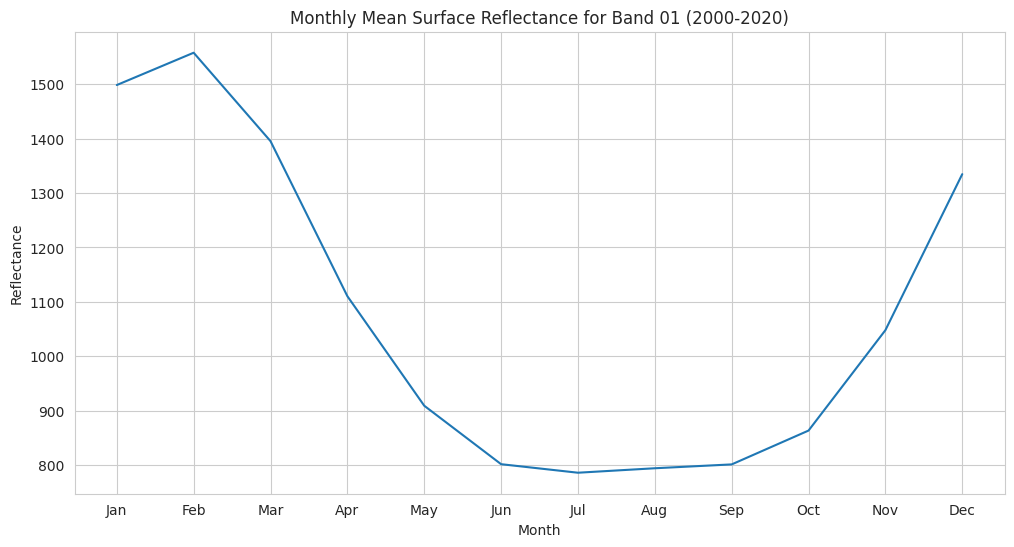

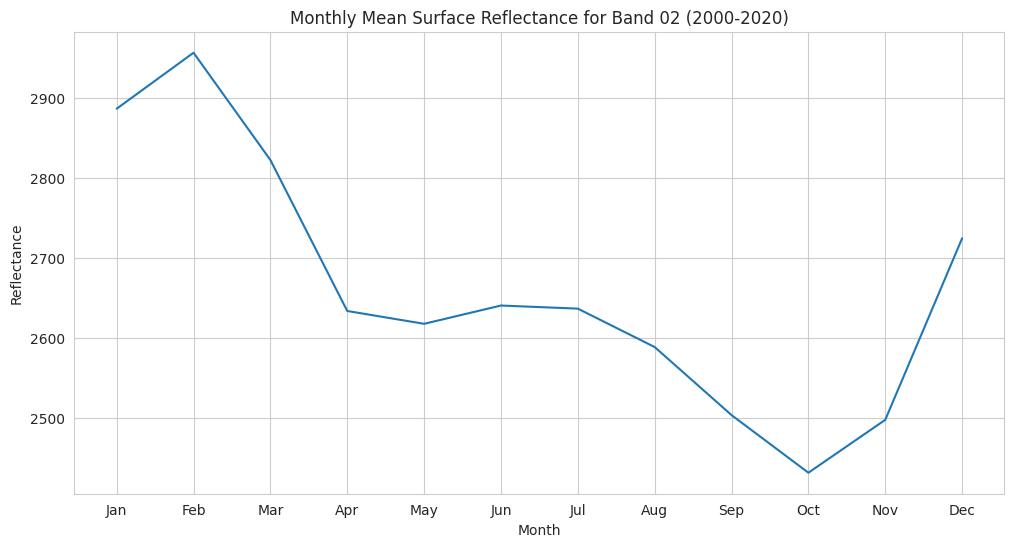

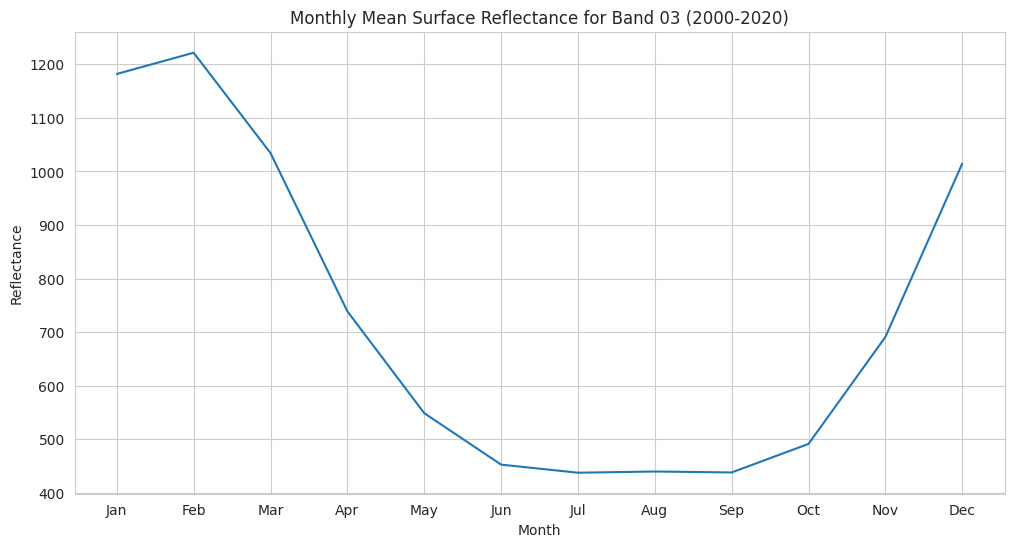

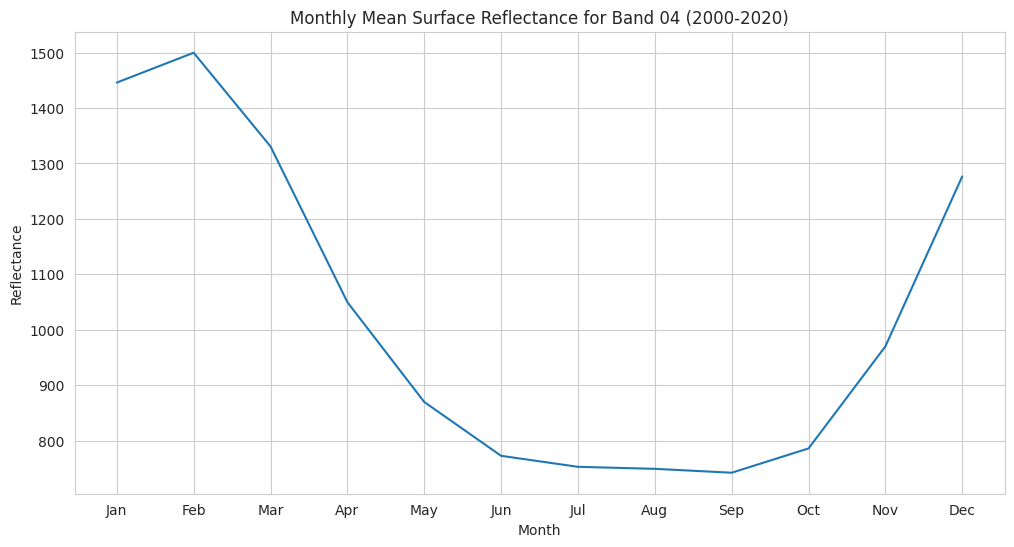

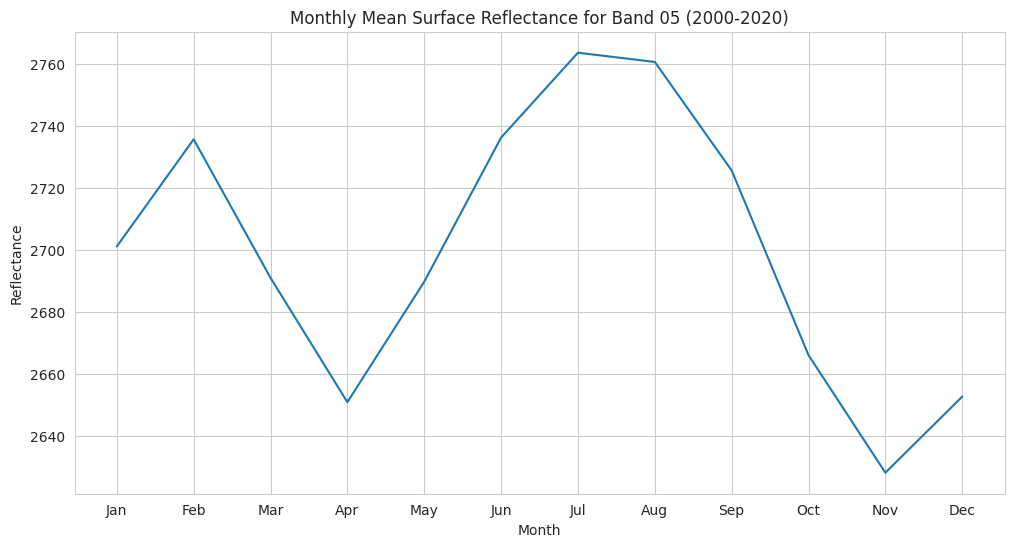

In [ ]:
sns.set_style("whitegrid")
df_long['Month'] = df_long['Month'].astype(int)

# Convert 'Month' to a cyclical feature since it wraps around at the end of the year
df_long['Month_sin'] = np.sin(2 * np.pi * df_long['Month']/12)
df_long['Month_cos'] = np.cos(2 * np.pi * df_long['Month']/12)

# Plotting
bands = df_long['Band'].unique()
for band in sorted(bands):
    plt.figure(figsize=(12, 6))
    band_data = df_long[df_long['Band'] == band]
    sns.lineplot(x='Month', y='Reflectance', data=band_data, estimator='mean', ci=None)
    plt.title(f'Monthly Mean Surface Reflectance for Band {band} (2000-2020)')
    plt.xlabel('Month')
    plt.ylabel('Reflectance')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

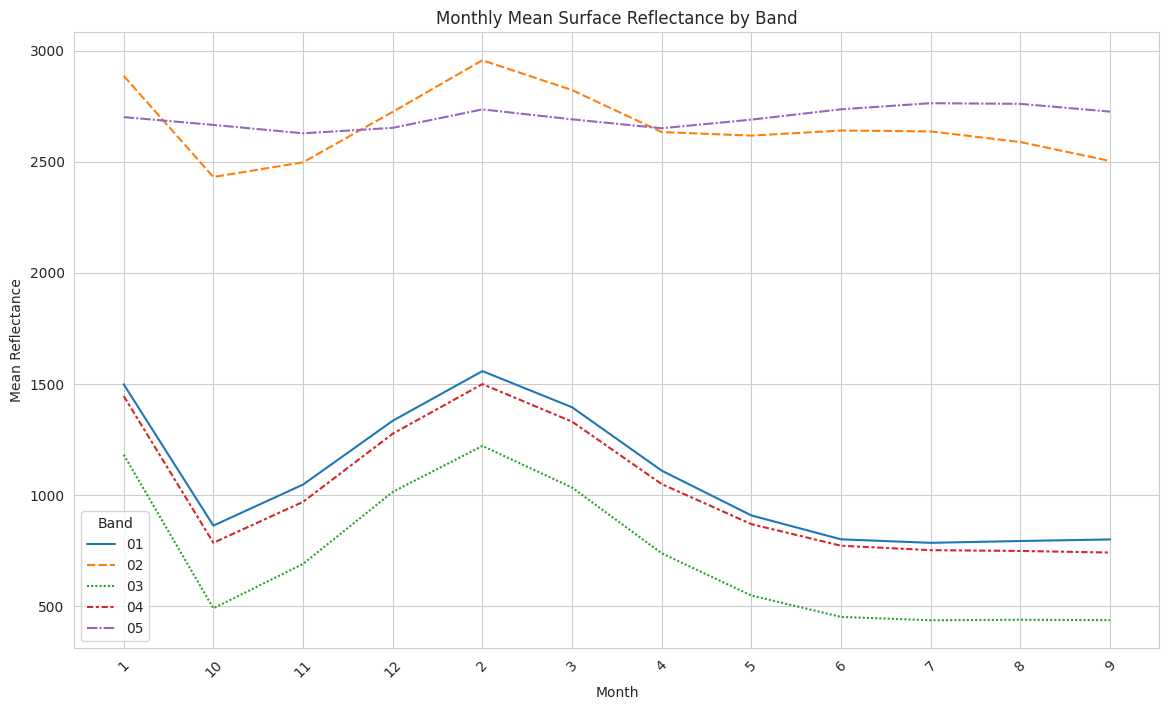

In [ ]:
df_long['Month'] = df_long['Month'].astype(int).astype(str)
df_pivoted = df_long.pivot_table(index='Month', columns='Band', values='Reflectance', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_pivoted)
plt.title('Monthly Mean Surface Reflectance by Band')
plt.xlabel('Month')
plt.ylabel('Mean Reflectance')
plt.xticks(rotation=45)
plt.legend(title='Band')
plt.show()

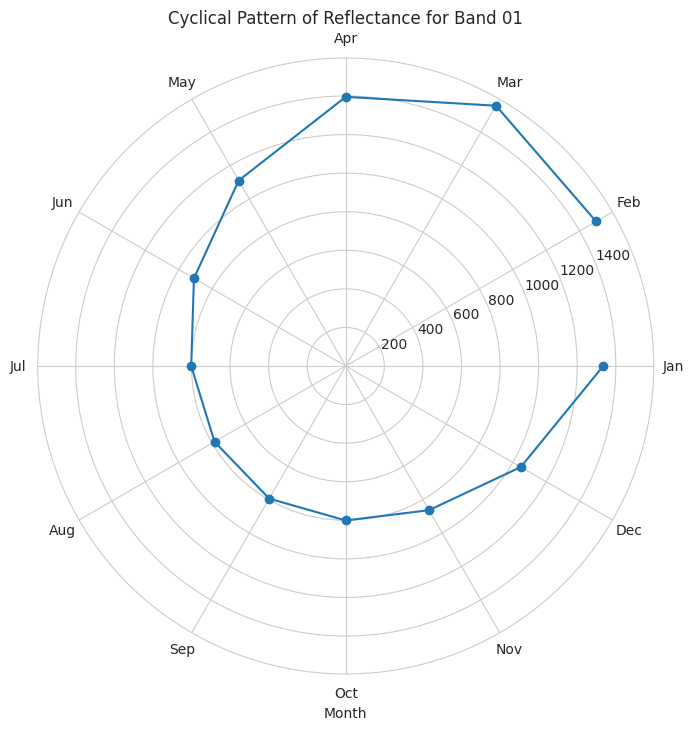

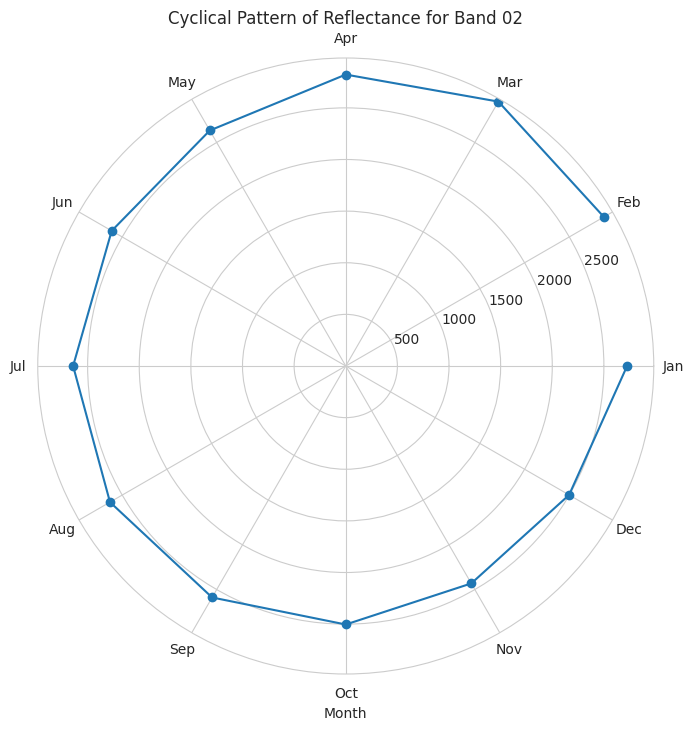

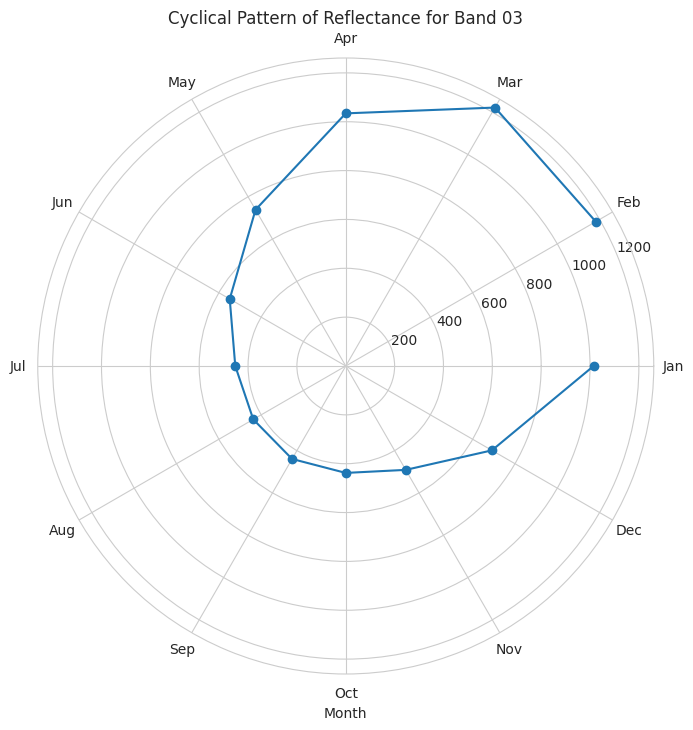

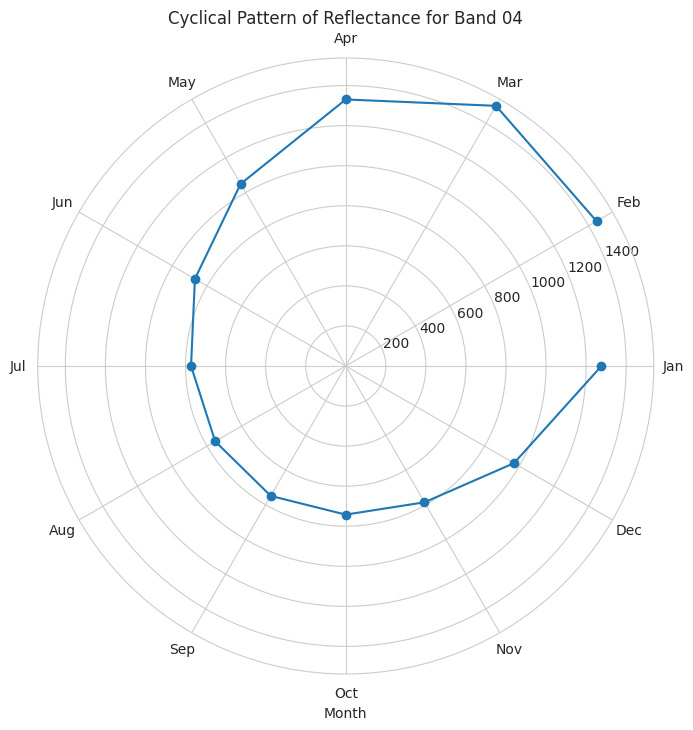

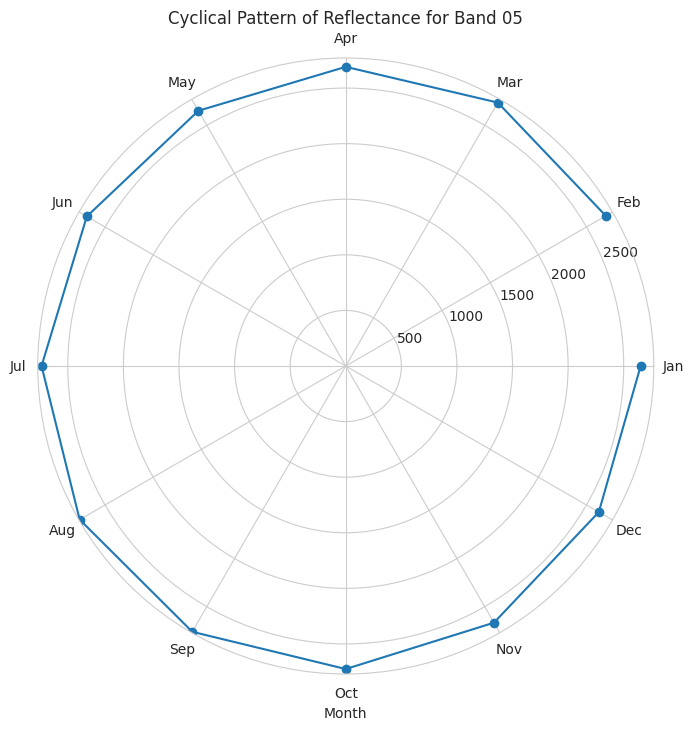

In [ ]:
for i in range(1,6):
    band_data = df_grouped[df_grouped['Band'] == f'0{i}']

    plt.figure(figsize=(8, 8))
    plt.subplot(projection='polar')
    plt.plot(np.deg2rad(band_data['Month'] * 30), band_data['Reflectance'], marker='o')  # Convert month to radians
    plt.title(f'Cyclical Pattern of Reflectance for Band 0{i}')
    plt.xlabel('Month')
    plt.xticks(np.deg2rad(np.arange(12) * 30), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

In [ ]:
df4= train_df[['id']+grouped_columns['VOD']].copy()
df4.head()

id  VOD_C_2002_2018_multiyear_mean_m01  \
0  192027691                            0.338971   
1  195542235                            0.265089   
2  196639184                            0.441699   
3  195728812                            0.340650   
4  195251545                            0.458608   

   VOD_C_2002_2018_multiyear_mean_m02  VOD_C_2002_2018_multiyear_mean_m03  \
0                            0.348590                            0.390214   
1                            0.248952                            0.228648   
2                            0.428869                            0.425790   
3                            0.331080                            0.343284   
4                            0.309740                            0.354649   

   VOD_C_2002_2018_multiyear_mean_m04  VOD_C_2002_2018_multiyear_mean_m05  \
0                            0.419935                            0.412300   
1                            0.219438                            0.212008   
2                            0.414703                            0.412291   
3                            0.334147                            0.338084   
4                            0.393623                            0.421163   

   VOD_C_2002_2018_multiyear_mean_m06  VOD_C_2002_2018_multiyear_mean_m07  \
0                            0.399303                            0.381950   
1                            0.200188                            0.206500   
2                            0.409913                            0.406059   
3                            0.336621                            0.345327   
4                            0.537507                            0.581277   

   VOD_C_2002_2018_multiyear_mean_m08  VOD_C_2002_2018_multiyear_mean_m09  \
0                            0.373861                            0.377692   
1                            0.204708                            0.206359   
2                            0.413054                            0.424531   
3                            0.338007                            0.334226   
4                            0.574287                            0.521677   

   ...  VOD_X_1997_2018_multiyear_mean_m03  \
0  ...                            0.455806   
1  ...                            0.277699   
2  ...                            0.436853   
3  ...                            0.334322   
4  ...                            0.358661   

   VOD_X_1997_2018_multiyear_mean_m04  VOD_X_1997_2018_multiyear_mean_m05  \
0                            0.506616                            0.531718   
1                            0.270621                            0.264534   
2                            0.439573                            0.446150   
3                            0.328369                            0.316033   
4                            0.419538                            0.466089   

   VOD_X_1997_2018_multiyear_mean_m06  VOD_X_1997_2018_multiyear_mean_m07  \
0                            0.509142                            0.444842   
1                            0.244796                            0.253600   
2                            0.451612                            0.444537   
3                            0.305631                            0.321647   
4                            0.562763                            0.608216   

   VOD_X_1997_2018_multiyear_mean_m08  VOD_X_1997_2018_multiyear_mean_m09  \
0                            0.423471                            0.444432   
1                            0.251986                            0.261273   
2                            0.434794                            0.444734   
3                            0.329818                            0.318389   
4                            0.610752                            0.565290   

   VOD_X_1997_2018_multiyear_mean_m10  VOD_X_1997_2018_multiyear_mean_m11  \
0                            0.472432                            0.448272   
1                        

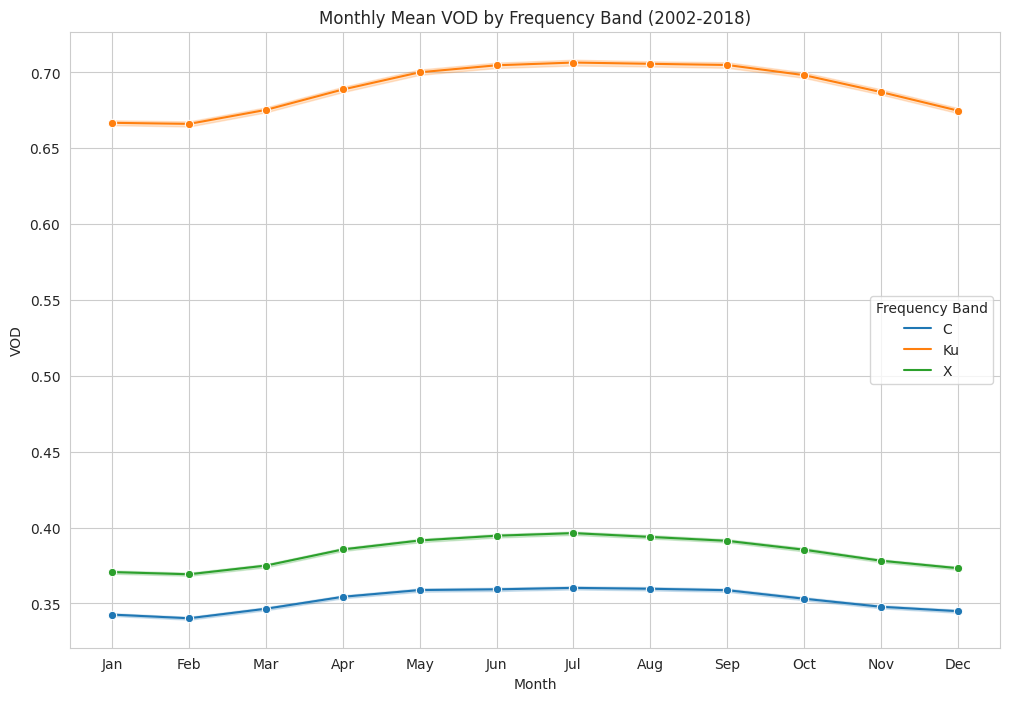

In [ ]:
df_melted = df4.melt(id_vars='id', var_name='Measurement', value_name='VOD')

df_melted['Band'] = df_melted['Measurement'].apply(lambda x: x.split('_')[1])
df_melted['Month'] = df_melted['Measurement'].apply(lambda x: x[-3:]).str.replace('m', '').astype(int)
df_melted.drop(columns=['Measurement'], inplace=True)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Month', y='VOD', hue='Band', marker='o')
plt.title('Monthly Mean VOD by Frequency Band (2002-2018)')
plt.xlabel('Month')
plt.ylabel('VOD')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Frequency Band')
plt.show()

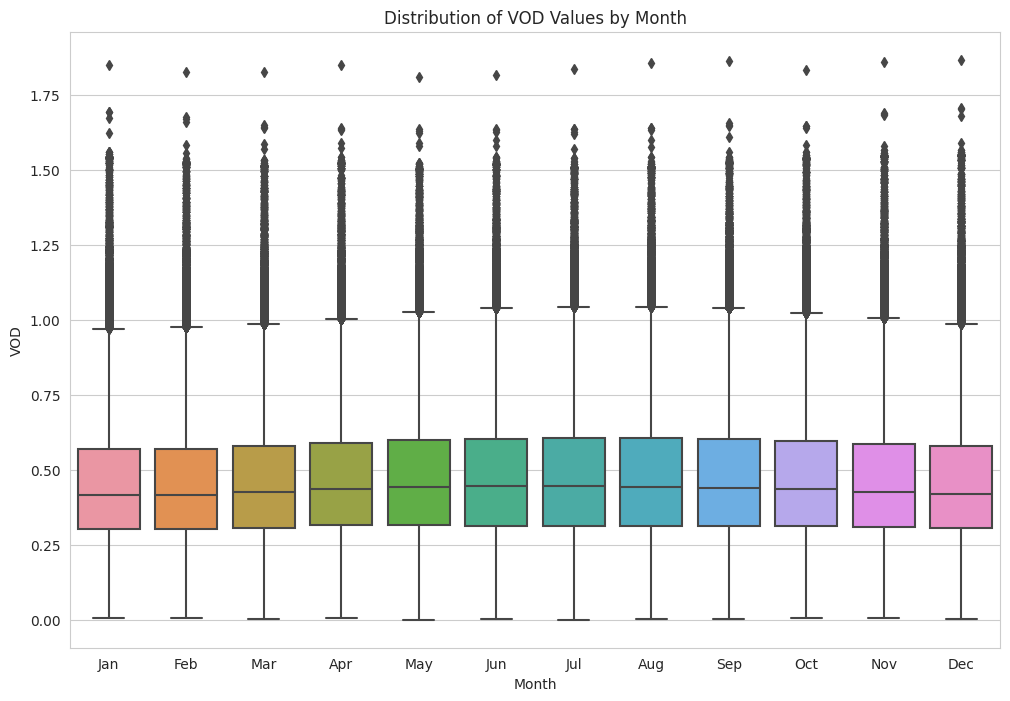

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Month', y='VOD')
plt.title('Distribution of VOD Values by Month')
plt.xlabel('Month')
plt.ylabel('VOD')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

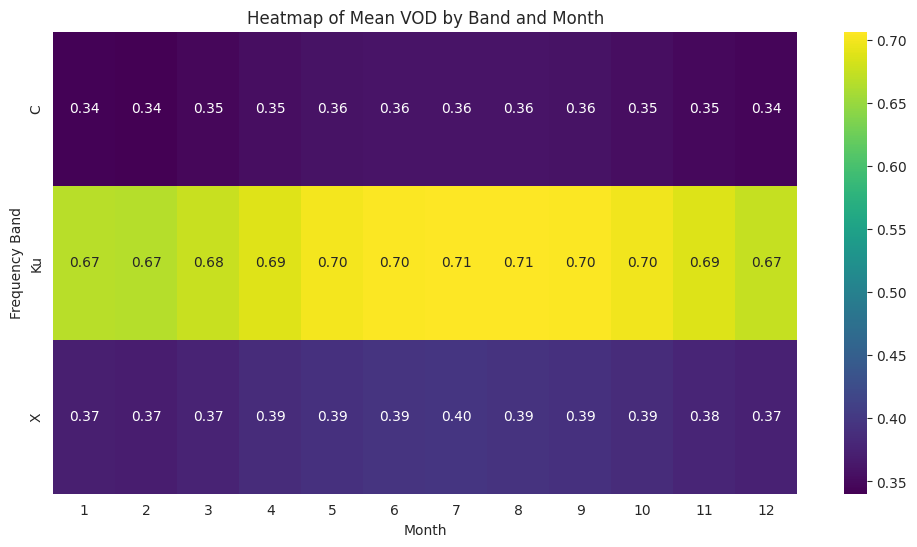

In [ ]:
vod_pivot = df_melted.pivot_table(index='Band', columns='Month', values='VOD', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(vod_pivot, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Mean VOD by Band and Month')
plt.xlabel('Month')
plt.ylabel('Frequency Band')
plt.show()

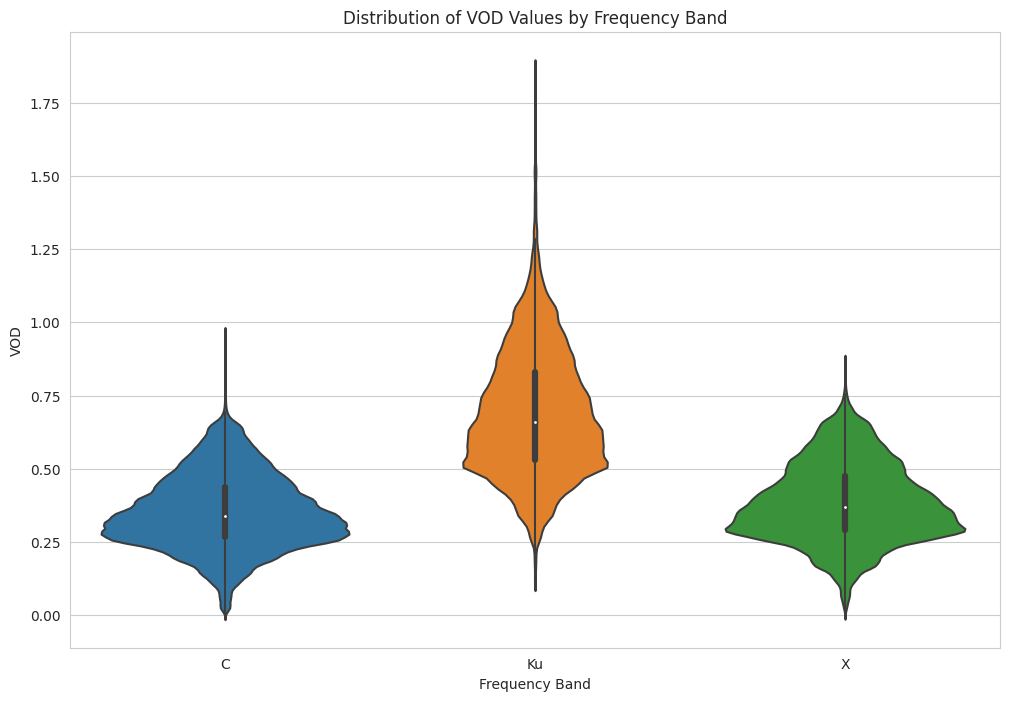

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_melted, x='Band', y='VOD')
plt.title('Distribution of VOD Values by Frequency Band')
plt.xlabel('Frequency Band')
plt.ylabel('VOD')
plt.show()

In [ ]:
df5= train_df[['id']+['X4_mean', 'X4_sd','X11_mean', 'X11_sd','X18_mean', 'X18_sd','X26_mean', 'X26_sd','X50_mean', 'X50_sd','X3112_mean', 'X3112_sd']].copy()
df5.head()

id   X4_mean     X4_sd   X11_mean    X11_sd  X18_mean    X18_sd  \
0  192027691  0.401753  0.008921  11.758108  1.601473  0.117484  0.025441   
1  195542235  0.480334  0.003102  15.748846  0.258078  0.389315  0.000866   
2  196639184  0.796917       NaN   5.291251       NaN  8.552908       NaN   
3  195728812  0.525236  0.011692   9.568305  2.818356  1.083629  0.110673   
4  195251545  0.411821  0.006157  14.528877  1.128000  0.657585  0.026996   

    X26_mean    X26_sd  X50_mean    X50_sd   X3112_mean    X3112_sd  
0   1.243779  0.153608  1.849375  0.279610    50.216034   15.045054  
1   0.642940  0.034630  1.353468  0.010165   574.098472   11.004477  
2   0.395241       NaN  2.343153       NaN  1130.096731         NaN  
3   0.154200  0.011334  1.155308  0.229224  1042.686546  141.857187  
4  10.919966  0.553815  2.246226  0.107092  2386.467180   87.146899

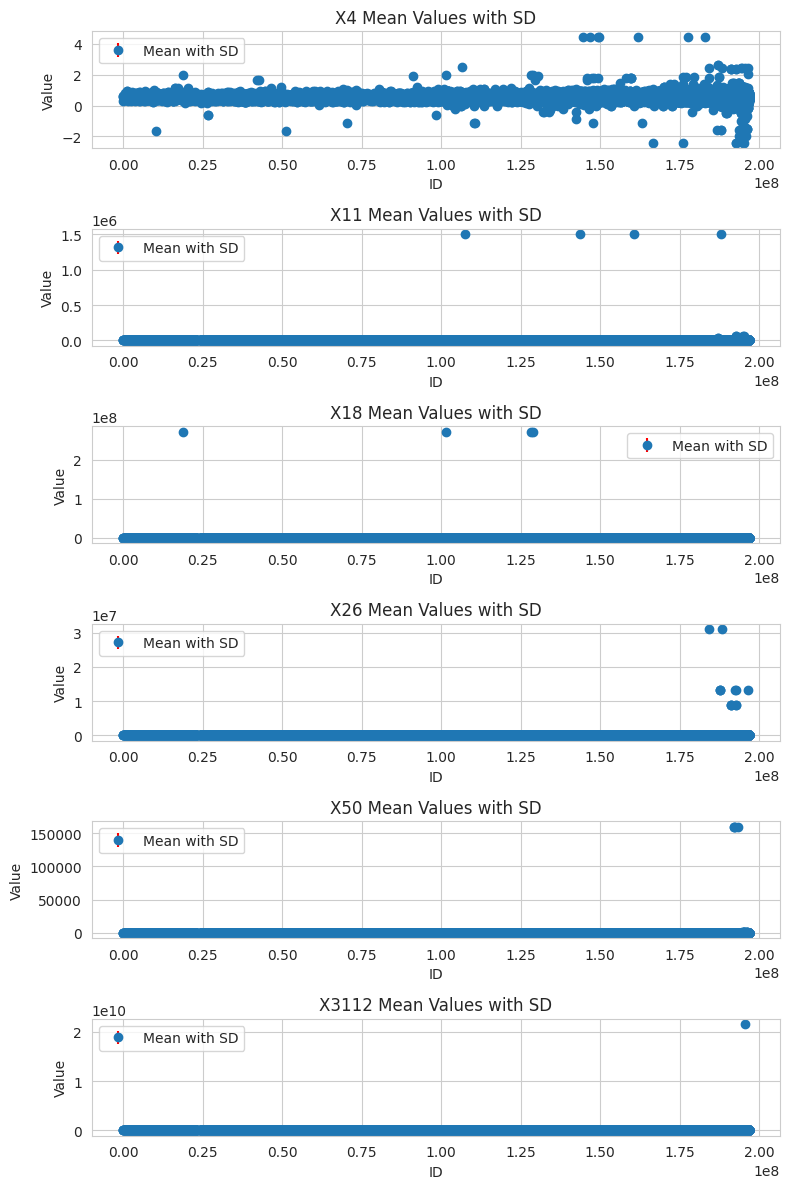

In [ ]:
measurements = ['X4', 'X11', 'X18', 'X26', 'X50', 'X3112']
fig, axs = plt.subplots(len(measurements), 1, figsize=(8, 12))

for i, measurement in enumerate(measurements):
    axs[i].errorbar(df5['id'], df5[f'{measurement}_mean'], yerr=df5[f'{measurement}_sd'], fmt='o', ecolor='r', capthick=2, label='Mean with SD')
    axs[i].set_title(f'{measurement} Mean Values with SD')
    axs[i].set_xlabel('ID')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
import os
folder_path = '/kaggle/input/planttraits2024/train_images'

# List all files in the folder
files_in_folder = os.listdir(folder_path)

# Filter out files that are images (based on extension)
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.tiff', '.bmp']  # Add or remove extensions as needed
image_files = [file for file in files_in_folder if any(file.lower().endswith(ext) for ext in image_extensions)]

# Get the count of image files
number_of_images = len(image_files)

print(f"Number of images in the folder: {number_of_images}")

Number of images in the folder: 55489


195757027
194702323
187428584
193776181
192707053


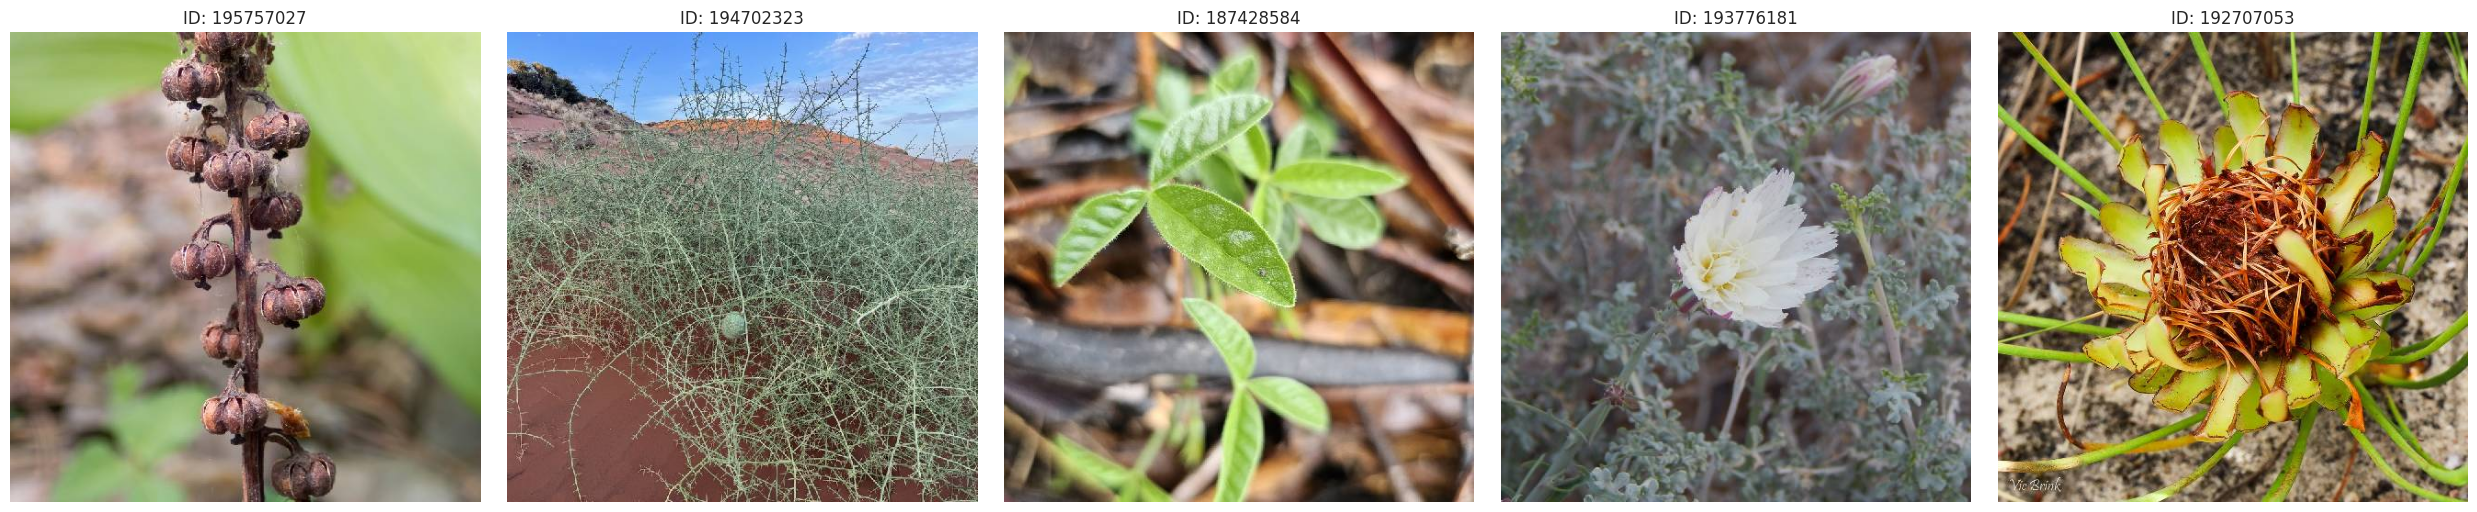

In [ ]:
import matplotlib.image as mpimg

def display_sample_images(df, image_folder_path, sample_size=5):

    sample_size = min(sample_size, len(df))
    sample_df = df.sample(n=sample_size)

    fig, axes = plt.subplots(1, sample_size, figsize=(sample_size * 5, 5))

    for ax, (_, row) in zip(axes, sample_df.iterrows()):
        image_id = str(int(row['id']))
        print(image_id)
        image_path = os.path.join(image_folder_path, f"{image_id}.jpeg")

        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"ID: {image_id}")

    plt.tight_layout()
    plt.show()

image_folder_path = '/kaggle/input/planttraits2024/train_images'

# Display a sample of 5 images
display_sample_images(train_df, image_folder_path, sample_size=5)

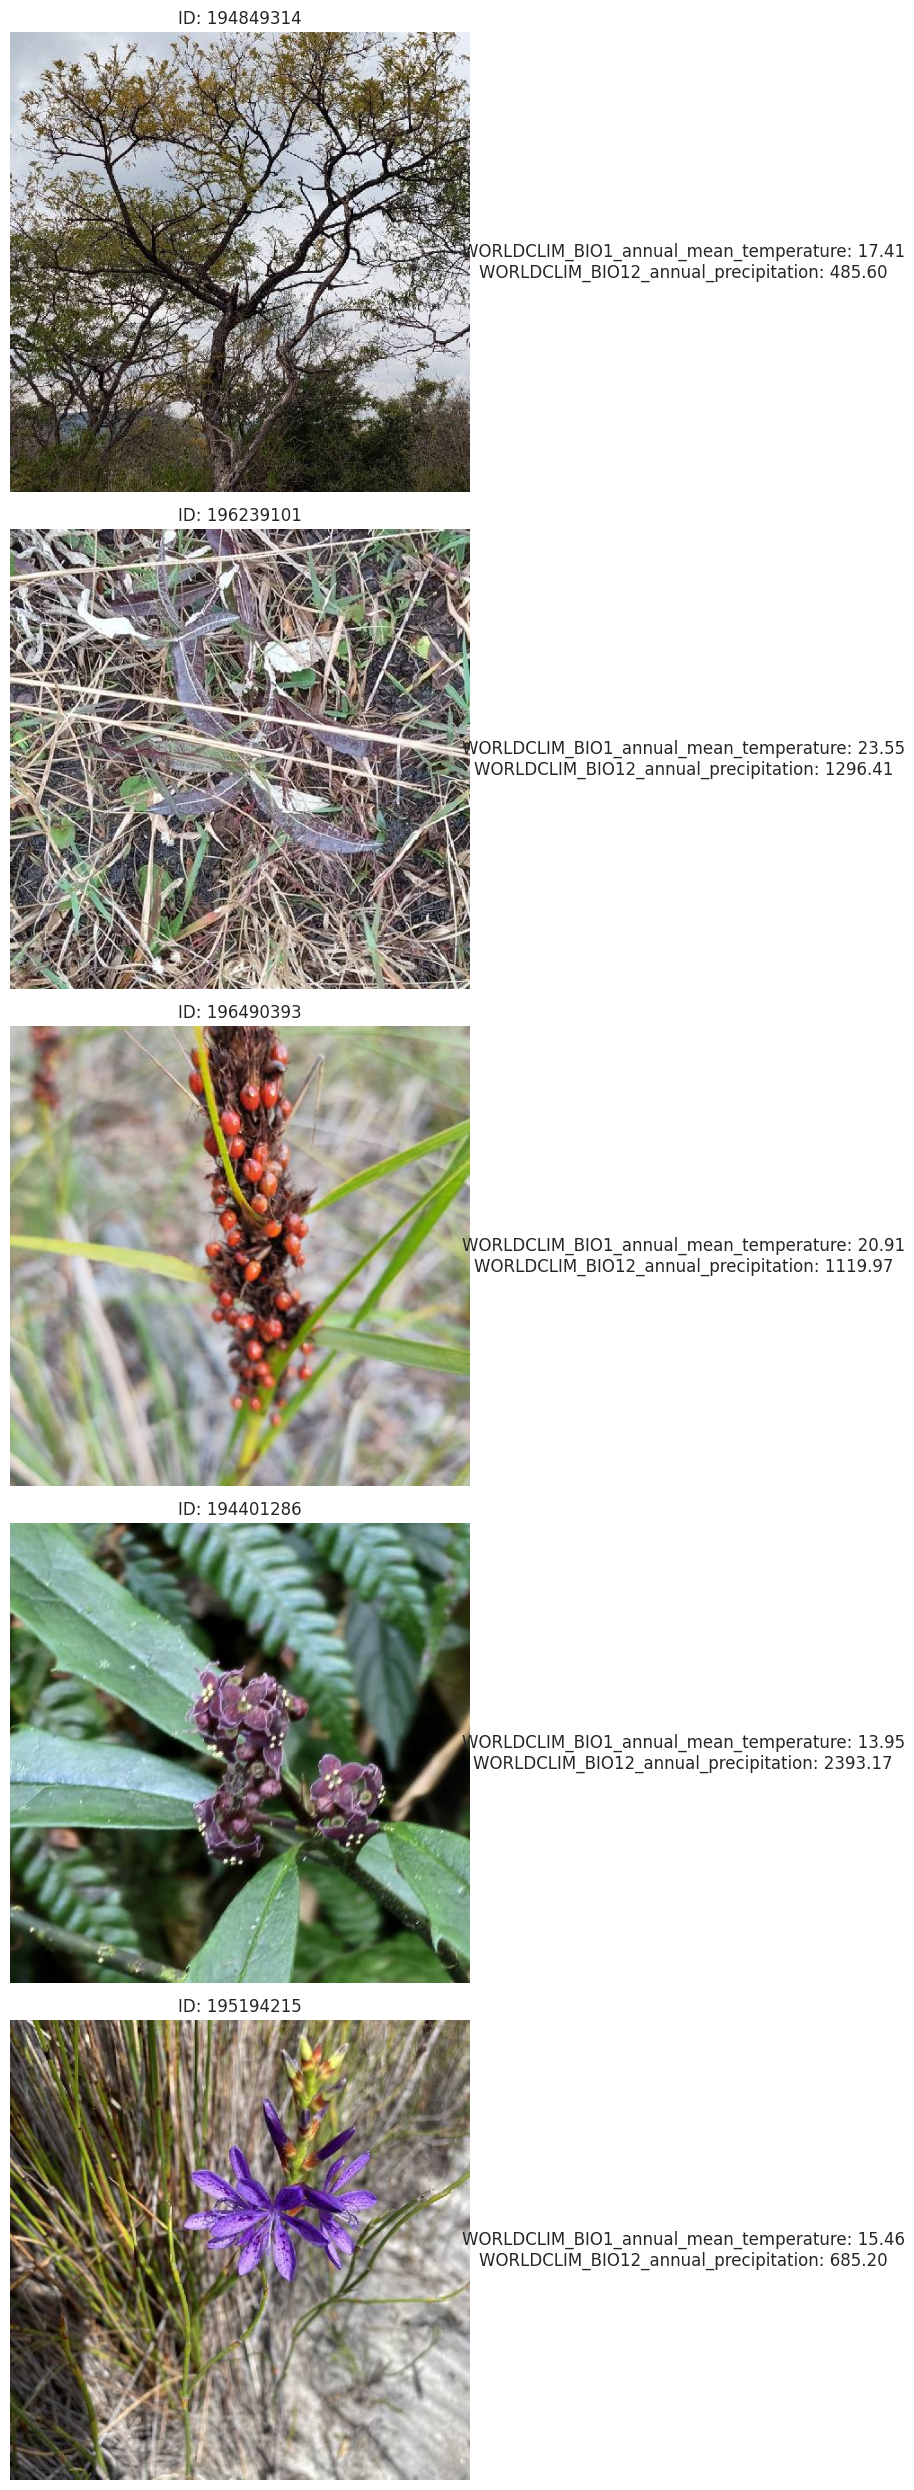

In [ ]:
def display_images_with_data(df, image_folder_path, sample_size=5, columns_to_display=[]):

    sample_size = min(sample_size, len(df))
    sample_df = df.sample(n=sample_size)

    fig, axes = plt.subplots(sample_size, 2, figsize=(10, sample_size * 5), gridspec_kw={'width_ratios': [3, 1]})

    for i, (_, row) in enumerate(sample_df.iterrows()):
        image_id = str(int(row['id']))
        image_path = os.path.join(image_folder_path, f"{image_id}.jpeg")
        img = mpimg.imread(image_path)

        # Display the image
        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"ID: {image_id}")

        # Display the associated data
        text_str = '\n'.join([f"{col}: {row[col]:.2f}" for col in columns_to_display])
        axes[i, 1].text(0.5, 0.5, text_str, ha='center', va='center', fontsize=12)
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

columns_to_display = ['WORLDCLIM_BIO1_annual_mean_temperature', 'WORLDCLIM_BIO12_annual_precipitation']
display_images_with_data(train_df, image_folder_path, sample_size=5, columns_to_display=columns_to_display)